<a href="https://colab.research.google.com/github/mrees002/ML/blob/main/NumberRecognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MLDS/DiRP Reading Group Project 1: Convolutional Neural Networks

For this project, you will writing a convolutional neural network using PyTorch.

### Getting Started: Google Colab

On Google Colab, click connect and start running cells. All the necessary packages are pre-installed.

### Getting Started: Local

To run this project locally with conda, run the following commands:

``` bash
conda create -n reading_group python==3.10.13
pip install torch
pip install scikit-learn
pip install juptyerlab
pip install tqdm
```

If you do not have conda, you can install the VSCode Extension `Python Environment Manager`, then it should prompt you to install conda.

### Project Tasks

1. Implement the CNN class
2. Define the dataloaders, criterion, optimizer, and model
3. Write the training loop
4. Experiment with different hyperparameters

### Bonus Tasks

1. Instead of classifying the images, try generating them. Pass the digit label into you model and output the image. Use mean sqaured error loss between the generated image and the target image.

## Useful Functions

``` python3
nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding)
nn.BatchNorm2d(num_features)
nn.Dropout(p)
nn.ReLU()

nn.MaxPool2d(kernel_size, stride)
nn.Flatten()
nn.Linear(in_features, out_features)
nn.BatchNorm1d(num_features)
nn.Softmax(dim)

random_split(dataset, lengths)
DataLoader(dataset, batch_size, shuffle)
nn.NLLLoss()
torch.optim(params, lr)
```

In [ ]:
import torch
from torch import Tensor, nn
from torch.utils.data import DataLoader, random_split
import torchvision
import torchvision.transforms as transforms
from matplotlib import pyplot as plt
from tqdm import tqdm

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)  # Adjust input size accordingly
        self.fc2 = nn.Linear(128, 10)  # 10 classes for digits 0-9

    def forward(self, x: Tensor) -> Tensor:
        x = nn.functional.relu(self.conv1(x))
        x = nn.functional.max_pool2d(x, 2)  # Max pooling layer
        x = nn.functional.relu(self.conv2(x))
        x = nn.functional.max_pool2d(x, 2)  # Max pooling layer
        x = x.view(x.size(0), -1)  # Flatten the tensor
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

Input shape: torch.Size([1, 28, 28])
Input min: tensor(0.)
Input max: tensor(1.)
Input:


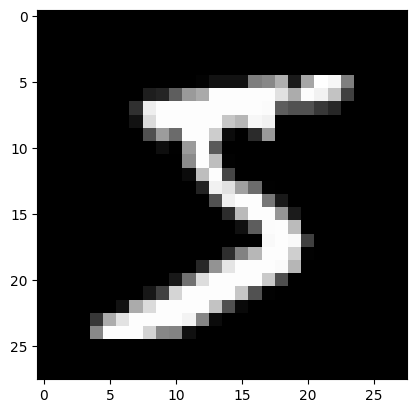

Target: 5


In [ ]:
# Download and load the dataset
# Add a transform to convert each PIL image to a PyTorch tensor
dataset = torchvision.datasets.MNIST(
    root="./data", download=True, transform=transforms.ToTensor()
)

print("Input shape:", dataset[0][0].shape)
print("Input min:", dataset[0][0].min())
print("Input max:", dataset[0][0].max())
print("Input:")
plt.imshow(dataset[0][0].squeeze(), cmap="gray")
plt.show()

print("Target:", dataset[0][1])

In [ ]:
# Create dataloaders
# YOUR CODE HERE

# Split dataset into training and test sets
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Define data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Create the CNN model
# YOUR CODE HERE

model = CNN()

# Define the loss function and optimizer
# YOUR CODE HERE

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

Epoch 1/3: 100%|██████████| 750/750 [01:07<00:00, 11.10batch/s]


Epoch [1/3], Loss: 0.0067
Accuracy of the model on the test images: 99.04%


Epoch 2/3: 100%|██████████| 750/750 [01:07<00:00, 11.08batch/s]


Epoch [2/3], Loss: 0.0066
Accuracy of the model on the test images: 98.91%


Epoch 3/3: 100%|██████████| 750/750 [01:08<00:00, 10.99batch/s]


Epoch [3/3], Loss: 0.0043
Accuracy of the model on the test images: 98.93%


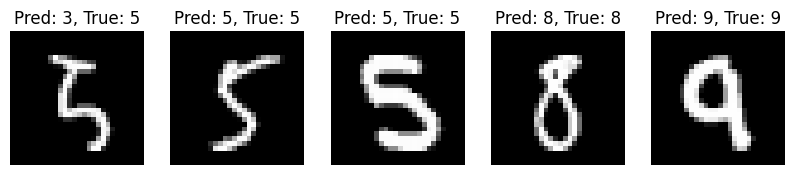

In [ ]:
# Train the model
num_epochs = 3
for epoch in range(num_epochs):
    # YOUR CODE HERE
    model.train()  # Set the model to training mode
    running_loss = 0.0
    for images, labels in tqdm(train_loader, desc=f'Epoch {epoch + 1}/{num_epochs}', unit='batch'):
        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {running_loss / len(train_loader):.4f}')

    # Evaluate the model
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0

    with torch.no_grad():
      for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f'Accuracy of the model on the test images: {100 * correct / total:.2f}%')

    # Visualize sample predictions
    def visualize_predictions(dataset, model, num_images=5):
      model.eval()
      with torch.no_grad():
        data_iter = iter(test_loader)
        images, labels = next(data_iter)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)

        fig, axes = plt.subplots(1, num_images, figsize=(10, 2))
        for i in range(num_images):
            ax = axes[i]
            ax.imshow(images[i][0], cmap="gray")
            ax.set_title(f'Pred: {predicted[i].item()}, True: {labels[i].item()}')
            ax.axis('off')
        plt.show()

visualize_predictions(test_loader, model)

In [ ]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import files

# Ensure your model is defined and trained (load it if necessary)
# model = YourModel()  # Replace with your model class
# model.load_state_dict(torch.load('path_to_your_model.pth'))
# model.eval()

# Define the image transformation
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # Ensure the image is grayscale
    transforms.Resize((28, 28)),  # Resize to 28x28
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize((0.5,), (0.5,)),  # Normalize
])

# Function to predict the number from an image
def predict_number(image_path):
    # Load the image
    image = Image.open(image_path)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()

    # Preprocess the image
    image = transform(image).unsqueeze(0)  # Add batch dimension

    # Make the prediction
    with torch.no_grad():
        outputs = model(image)
        _, predicted = torch.max(outputs.data, 1)

    print(f'Predicted Number: {predicted.item()}')

# Upload an image
uploaded = files.upload()

# Predict for each uploaded file
for filename in uploaded.keys():
    predict_number(filename)